<a href="https://colab.research.google.com/github/Henrxque/Analise_exploratoria_IMDB/blob/main/Projeto_IMDB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size = 5 font face = "Helvetica "> Análise exploratória: Bilheteria e Top 1000 filmes pelo IMDB


<br>

##O que é Análise exploratória?

Análise exploratória de dados, é utilizada por Cientistas de Dados para investigar e analisar um conjunto de dados abstratos e então tirar conclusões que podem ajudar na tomada de decisão ou na obtenção de uma informação importante. Na Análise exploratória, o Cientista de Dados consegue identificar Padrões, anomalias e verificar suposições, utilizando técnicas de controle e manipulação de Dados.

<br>


---

<br>


##Sobre o Projeto

Imagine que trabalhamos em um projeto para uma grande produtora de Filmes que deseja lançar tanto um filme bem recebido pela crítica, um filme bem recebido pelo público e um filme sucesso de bilheteria. 

Mas para isso precisamos definir um critério para auxiliar na tomada de decisão: 

* Análise sobre a Bilheteria, para definir um filme de sucesso. 
* Análise sobre a nota do público no IMDB. 
* Análise sobre a nota da crítica (METASCORE) pelo IMDB. 



</font>






##Perguntas a serem respondidas:


Início:

* Top 10 filmes em Bilheteria
* Top 10 filmes em avaliação no IMDB
* Top 10 filmes em avaliação com o Metascore 

Bilheteria: 

* O Gênero de um filme impacta na bilheteria?
* Quais os gêneros que possui maior valor em bilheteria?
* Quais os gêneros mais rentáveis?

Avaliação no IMDB:
* Qual o gênero com melhores avaliações no IMDB pelo público e pela crítica (METASCORE)?
* Qual a média de avaliação por gênero?
* Entre os atores principais, quais estão presente nos melhores filmes?
* Qual é realmente os melhores filmes do IMDB, juntando a nota do público com a nota da crítica?




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from google.colab import drive
import zipfile

In [2]:
drive.mount('/content/drive') #acessando o Drive

Mounted at /content/drive


In [3]:
boxoffice = pd.read_csv('/content/drive/MyDrive/Dataset/Movies/boxofficemojotop1000.tsv', sep='\t', header=0)
genres = pd.read_csv('/content/drive/MyDrive/Dataset/Movies/boxofficemojotopgenres.tsv', sep='\t', header=0)
movies = pd.read_csv('/content/drive/MyDrive/Dataset/Movies/top1000imdb.csv')

In [4]:
boxoffice.head(3)

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year
0,1,Avatar,2847246203,760507625,0.27,2086738578,0.73,2009
1,2,Avengers: Endgame,2797501328,858373000,0.31,1939128328,0.69,2019
2,3,Titanic,2201647264,659363944,0.30,1542283320,0.70,1997


In [8]:
genres.head(3)

,Genre,Total,Titles,#1 Title,Lifetime Gross
0,Heroine,8513688318,82,Star Wars: Episode VII - The Force Awakens,936662225
1,Adventure,68146286235,877,Star Wars: Episode VII - The Force Awakens,936662225
2,Supernatural,60041261115,750,Star Wars: Episode VII - The Force Awakens,936662225


In [6]:
movies.head(3)

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M


In [10]:
genres['Total'] = genres['Total'].astype(float)
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Genre           245 non-null    object 
 1   Total           245 non-null    float64
 2   Titles          245 non-null    int64  
 3   #1 Title        245 non-null    object 
 4   Lifetime Gross  245 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 9.7+ KB


In [11]:
print('O Dataset de Bilheteria possui possui %s linhas e %s colunas' % (boxoffice.shape[0], boxoffice.shape[1]))
print('O Dataset de Gêneros (Box Office) possui possui %s linhas e %s colunas' % (genres.shape[0], genres.shape[1]))
print('O Dataset de Filmes no IMDB possui possui %s linhas e %s colunas' % (movies.shape[0], movies.shape[1]))


O Dataset de Bilheteria possui possui 1000 linhas e 8 colunas
O Dataset de Gêneros (Box Office) possui possui 245 linhas e 5 colunas
O Dataset de Filmes no IMDB possui possui 1000 linhas e 16 colunas


## Data Cleaning


Vamos limpar alguns dados dos nossos Datasets, que não serão necessários durante o projeto. Dentro do Dataset de gêneros vamos remover a coluna #1 Title e Lifetime Gross pois são informações que já temos no Dataset de Bilheteria. 

No Dataset de Filmes vamos remover DETAIL ABOUT MOVIE\n	e certificate que basicamente é a Sinopse do filme e a classificação indicativa, pois acredito que pode não ter sentido dentro do nosso projeto. 


<br>


In [12]:
genres.head()

,Genre,Total,Titles,#1 Title,Lifetime Gross
0,Heroine,8.513688e+09,82,Star Wars: Episode VII - The Force Awakens,936662225
1,Adventure,6.814629e+10,877,Star Wars: Episode VII - The Force Awakens,936662225
2,Supernatural,6.004126e+10,750,Star Wars: Episode VII - The Force Awakens,936662225
3,IMAX,5.624990e+10,372,Star Wars: Episode VII - The Force Awakens,936662225
4,3D,5.074550e+10,394,Star Wars: Episode VII - The Force Awakens,936662225


In [13]:
genres.drop(['#1 Title','Lifetime Gross'], axis = 1, inplace = True)

In [14]:
genres.head()

,Genre,Total,Titles
0,Heroine,8.513688e+09,82
1,Adventure,6.814629e+10,877
2,Supernatural,6.004126e+10,750
3,IMAX,5.624990e+10,372
4,3D,5.074550e+10,394


:Encontrei no Dataset os "Gêneros IMAX e 3D" no top 4 de Gêneros, isso pode impactar negativamente nossas análises pois, IMAX e 3D não são gêneros de filme, e sim um formato de assistir o filme no Cinema. Portanto vou excluí-los do Dataset

In [15]:
genres.drop([3,4], inplace= True)
genres.head()

,Genre,Total,Titles
0,Heroine,8.513688e+09,82
1,Adventure,6.814629e+10,877
2,Supernatural,6.004126e+10,750
5,Comic Book Adaptation,2.566524e+10,181
6,Invasion,7.243530e+09,58


In [16]:
movies.head()

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,12A,201 min,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,15,195 min,"Biography, Drama, History",9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


:Removi as colunas "DETAIL ABOUT MOVIE" e "Ceriticate" pois acredito não serem úteis para o projeto. 

In [17]:
movies.drop(['DETAIL ABOUT MOVIE\n','certificate'], axis = 1, inplace = True)
movies.head()

,ranking of movie\r\n,movie name\r\n,Year,runtime,genre,RATING,metascore,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,81.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


## Renomeando as colunas. 

Para facilitar o entendimento aos leitores, irei alterar os nomes das colunas. 

In [18]:
boxoffice.columns = ['Rank', 'Filme', 'Bilheteria_Mundial', 'Bilheteria_Domestic','%Domestic','Bilheteria_Ext','%Ext','Ano']
boxoffice.head(2)

,Rank,Filme,Bilheteria_Mundial,Bilheteria_Domestic,%Domestic,Bilheteria_Ext,%Ext,Ano
0,1,Avatar,2847246203,760507625,0.27,2086738578,0.73,2009
1,2,Avengers: Endgame,2797501328,858373000,0.31,1939128328,0.69,2019


In [19]:
movies.columns = ['Rank', 'Filme', 'Ano', 'Tempo','Genero','Nota','Metascore','Diretor','Ator1','Ator2','Ator3','Ator4','Votos','Bilheteria_Domestic']
movies.head(2)

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,81.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M


In [20]:
genres.columns = ['Genero','Bilheteria_Genero','Qtd_Filmes']
genres.head(2)

,Genero,Bilheteria_Genero,Qtd_Filmes
0,Heroine,8.513688e+09,82
1,Adventure,6.814629e+10,877


## Dicionário de Dados


Boxoffice (Bilheteria)
* Rank: Indica o ranking dos filmes com maiores bilheteria. 
* Filme: Nome do Filme.
* Bilheteria Mundial: Soma da Bilheteria de todo mundo.
* Bilheteria_domestic: Soma de Bilheteria Doméstica, ou seja, do país que o filme foi realizado. 
* %Domestic: Quantos % de Bilheteria Domestica equivale na soma Mundial. 
* Bilheteria_Ext: Soma de Bilheteria restante do mundo. 
* %Ext: Quantos % de Bilheteria Extrangeira equivale na soma Mundial. 
* Ano: Ano de lançamento do Filme. 


Movies (Filmes)
* Rank: Ranking do filme entre os 1000 melhores filmes do IMDB.
* Filme: Nome do Filme
* Tempo: Tempo do Filme. 
* Genero: Genero do filme. 
* Nota: Média de Notas do Público para o filme.
* Metascore: Média de nota da Crítica pelo Metascore.
* Diretor: Nome do Diretor. 
* Ator[N]: Artistas envolvidos no filme.


Genres (Gêneros)
* Genero: Genero do Filme. 
* Bilheteria_Genero: SOma de bilheteria para aquele Genero.
* Qtd_Filmes: Soma de filmes de determinado Genero.

Explorando o Dataset, identifiquei que alguns filmes não possuem nota no Metascore, isso devido a aparentemente esses filmes serem poucos conhecidos ao redor do mundo, e serem segmentados demais a apenas um País, portanto vamos remover do Dataset pois pode impactar em nosso resultado. 

In [21]:
movies.info() #Identificando 837 filmes apenas com avaliação no IMDB ao invés de 1000. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   object 
 1   Filme                1000 non-null   object 
 2   Ano                  1000 non-null   object 
 3   Tempo                1000 non-null   object 
 4   Genero               1000 non-null   object 
 5   Nota                 1000 non-null   float64
 6   Metascore            837 non-null    float64
 7   Diretor              1000 non-null   object 
 8   Ator1                1000 non-null   object 
 9   Ator2                1000 non-null   object 
 10  Ator3                1000 non-null   object 
 11  Ator4                1000 non-null   object 
 12  Votos                1000 non-null   object 
 13  Bilheteria_Domestic  820 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


In [22]:
movies.query("Metascore != Metascore") #fiz uma query para identificar o que estava acontecendo, e identifiquei muitos filmes Segmentados, geralmente da Índia ou filmes poucos conhecidos, o que não faz sentido para nossa Case de "Filmes de Sucesso" ao redor do mundo. 

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic
7,8,Jai Bhim,-2021,164 min,"Crime, Drama, Mystery",8.9,NaN,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan K.,Rajisha Vijayan,"191,329",NaN
15,16,Soorarai Pottru,-2020,153 min,Drama,8.7,NaN,Sudha Kongara,Suriya,Paresh Rawal,Aparna Balamurali,Urvashi,"111,090",NaN
34,35,Asuran,-2019,141 min,"Action, Drama",8.5,NaN,Vetrimaaran,Dhanush,Manju Warrier,Prakash Raj,Pasupathy,"26,935",NaN
38,39,K.G.F: Chapter 2,-2022,168 min,"Action, Crime, Drama",8.5,NaN,Prashanth Neel,Yash,Sanjay Dutt,Raveena Tandon,Srinidhi Shetty,"109,453",NaN
39,40,Sardar Udham,-2021,164 min,"Biography, Crime, Drama",8.5,NaN,Shoojit Sircar,Vicky Kaushal,Shaun Scott,Stephen Hogan,Amol Parashar,"39,965",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,Belle de Jour,-1967,100 min,"Drama, Romance",7.7,NaN,Luis Buñuel,Catherine Deneuve,Jean Sorel,Michel Piccoli,Geneviève Page,"44,120",$0.03M
898,899,Breathless,-1960,90 min,"Crime, Drama",7.7,NaN,Jean-Luc Godard,Jean-Paul Belmondo,Jean Seberg,Daniel Boulanger,Henri-Jacques Huet,"80,234",$0.34M
903,904,Key Largo,-1948,100 min,"Action, Crime, Drama",7.7,NaN,John Huston,Humphrey Bogart,Edward G. Robinson,Lauren Bacall,Lionel Barrymore,"40,559",NaN
930,931,Cell 211,-2009,113 min,"Action, Crime, Drama",7.6,NaN,Daniel Monzón,Luis Tosar,Alberto Ammann,Antonio Resines,Manuel Morón,"67,334",NaN


In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   object 
 1   Filme                1000 non-null   object 
 2   Ano                  1000 non-null   object 
 3   Tempo                1000 non-null   object 
 4   Genero               1000 non-null   object 
 5   Nota                 1000 non-null   float64
 6   Metascore            837 non-null    float64
 7   Diretor              1000 non-null   object 
 8   Ator1                1000 non-null   object 
 9   Ator2                1000 non-null   object 
 10  Ator3                1000 non-null   object 
 11  Ator4                1000 non-null   object 
 12  Votos                1000 non-null   object 
 13  Bilheteria_Domestic  820 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


In [24]:
movies.dropna(subset=['Metascore'], inplace=True)


In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 837 non-null    object 
 1   Filme                837 non-null    object 
 2   Ano                  837 non-null    object 
 3   Tempo                837 non-null    object 
 4   Genero               837 non-null    object 
 5   Nota                 837 non-null    float64
 6   Metascore            837 non-null    float64
 7   Diretor              837 non-null    object 
 8   Ator1                837 non-null    object 
 9   Ator2                837 non-null    object 
 10  Ator3                837 non-null    object 
 11  Ator4                837 non-null    object 
 12  Votos                837 non-null    object 
 13  Bilheteria_Domestic  738 non-null    object 
dtypes: float64(2), object(12)
memory usage: 98.1+ KB


In [26]:
boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   int64  
 1   Filme                1000 non-null   object 
 2   Bilheteria_Mundial   1000 non-null   int64  
 3   Bilheteria_Domestic  1000 non-null   int64  
 4   %Domestic            1000 non-null   float64
 5   Bilheteria_Ext       1000 non-null   int64  
 6   %Ext                 1000 non-null   float64
 7   Ano                  1000 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [27]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 244
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genero             243 non-null    object 
 1   Bilheteria_Genero  243 non-null    float64
 2   Qtd_Filmes         243 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.6+ KB


## Análise Exploratória e Data Visualization

#### Q1: Top 10

Neste primeiro questionamento bem simples, precisamos demonstrar o Top 10 de cada Dataset, ou seja, top 10 Filmes no IMDB, Filmes no Metascore,  Bilheteria e Bilheteria dos Gêneros

##### Top 10 Filmes no IMDB

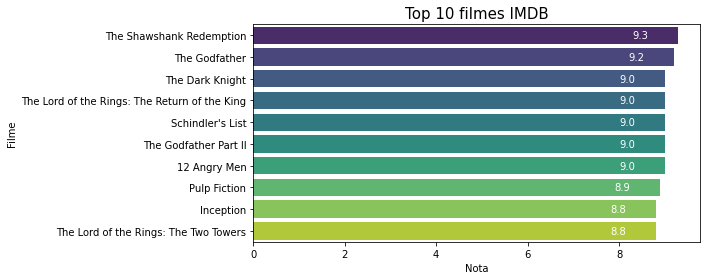

In [28]:
plt.figure(figsize=(8,4))
plt.title('Top 10 filmes IMDB', fontsize=15)
filmes = sns.barplot(x='Nota',y='Filme',data= movies.head(10),palette='viridis')

for p in filmes.patches:
    width = p.get_width()    #obter a largura da barra
    filmes.text(width + -1, #posicionei o texto em -1 para aparecer dentro da barra
            p.get_y() + p.get_height() / 2, # obtive a posição do Y + posição do X  / 2
            '{:1.1f}'.format(width), # Casas decimais
            ha = 'left',   # Ordenar pela horizontal
            va = 'center',# Ordenar pela vertical
            color='white') #coloquei a cor branca por causa das cores do plot
plt.show()


##### Top Filmes no METASCORE


Identifiquei nesse Dataset que o top 10 do Metascore, todos os filmes são compostos pela nota máxima, ou seja 100. E há mais filmes com nota 100 do que do que apenas 10, portanto o questionamento que eu quero chegar nesse passo é: Quais são os filmes com nota máxima no Metascore. Mais tarde vamos querer analisar aa nota do Metascore e a nota do IMDB, portanto seria interessante termos a distribuição dessas notas no Metascore. 

In [29]:
max_meta = movies.query("Metascore >= 100")

In [30]:
max_meta

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
55,56,Rear Window,-1954,112 min,"Mystery, Thriller",8.5,100.0,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,"482,791",$36.76M
56,57,Casablanca,-1942,102 min,"Drama, Romance, War",8.5,100.0,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,"562,032",$1.02M
121,122,Lawrence of Arabia,-1962,218 min,"Adventure, Biography, Drama",8.3,100.0,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,"289,377",$44.82M
125,126,Vertigo,-1958,128 min,"Mystery, Romance, Thriller",8.3,100.0,Alfred Hitchcock,James Stewart,Kim Novak,Barbara Bel Geddes,Tom Helmore,"396,060",$3.20M
131,132,Citizen Kane,-1941,119 min,"Drama, Mystery",8.3,100.0,Orson Welles,Orson Welles,Joseph Cotten,Dorothy Comingore,Agnes Moorehead,"436,067",$1.59M
273,274,Three Colours: Red,-1994,99 min,"Drama, Mystery, Romance",8.1,100.0,Krzysztof Kieslowski,Irène Jacob,Jean-Louis Trintignant,Frédérique Feder,Jean-Pierre Lorit,"101,965",$4.04M
286,287,Fanny and Alexander,-1982,188 min,Drama,8.1,100.0,Ingmar Bergman,Bertil Guve,Pernilla Allwin,Kristina Adolphson,Börje Ahlstedt,"63,380",$4.97M
435,436,The Leopard,-1963,186 min,"Drama, History",8.0,100.0,Luchino Visconti,Burt Lancaster,Alain Delon,Claudia Cardinale,Paolo Stoppa,"25,747",NaN
446,447,Sweet Smell of Success,-1957,96 min,"Drama, Film-Noir",8.0,100.0,Alexander Mackendrick,Burt Lancaster,Tony Curtis,Susan Harrison,Martin Milner,"31,683",NaN


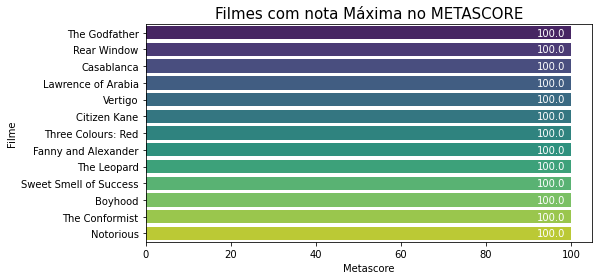

In [31]:
plt.figure(figsize=(8,4))
plt.title('Filmes com nota Máxima no METASCORE', fontsize=15)
metascore = sns.barplot(x='Metascore',y='Filme',data= max_meta, palette='viridis')

for p in metascore.patches:
    width = p.get_width()   
    metascore.text(width + -8, 
            p.get_y() + p.get_height() / 2, 
            '{:1.1f}'.format(width), 
            ha = 'left',   
            va = 'center',
            color='white') 
plt.show()


##### Top 10 Maiores Bilheterias da História

In [59]:
boxoffice['Bilheteria_Mundial'] = boxoffice['Bilheteria_Mundial'].astype(float)
boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   int64  
 1   Filme                1000 non-null   object 
 2   Bilheteria_Mundial   1000 non-null   float64
 3   Bilheteria_Domestic  1000 non-null   int64  
 4   %Domestic            1000 non-null   float64
 5   Bilheteria_Ext       1000 non-null   int64  
 6   %Ext                 1000 non-null   float64
 7   Ano                  1000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 62.6+ KB


In [60]:
boxoffice['Bilheteria_Domestic'] = boxoffice['Bilheteria_Domestic'].astype(float)
boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   int64  
 1   Filme                1000 non-null   object 
 2   Bilheteria_Mundial   1000 non-null   float64
 3   Bilheteria_Domestic  1000 non-null   float64
 4   %Domestic            1000 non-null   float64
 5   Bilheteria_Ext       1000 non-null   int64  
 6   %Ext                 1000 non-null   float64
 7   Ano                  1000 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [95]:
pivot_boxoffice = pd.pivot_table(boxoffice, index = ['Filme'])

,,%Domestic,%Ext,Ano,Bilheteria_Domestic,Bilheteria_Ext,Rank
Filme,Bilheteria_Mundial,,,,,,
10000 BC,2.697842e+08,0.35,0.65,2008,94784201.0,175000000,581
101 Dalmatians,3.206893e+08,0.42,0.58,1996,136189294.0,184500000,469
102 Dalmatians,1.836118e+08,0.36,0.64,2000,66957026.0,116654745,927
12 Years a Slave,1.877332e+08,0.30,0.70,2013,56671993.0,131061209,904
1917,3.849194e+08,0.41,0.59,2019,159227644.0,225691745,338
...,...,...,...,...,...,...,...
Your Name,3.581801e+08,0.01,0.99,2016,5017246.0,353162869,391
Youth,2.270913e+08,0.01,0.99,2017,1891956.0,225199334,719
Zootopia,1.024121e+09,0.33,0.67,2016,341268248.0,682852856,46


In [109]:
boxoffice.head(10).style.format({'Bilheteria_Mundial': ' U$ {:,.2f}'})

,Rank,Filme,Bilheteria_Mundial,Bilheteria_Domestic,%Domestic,Bilheteria_Ext,%Ext,Ano
0,1,Avatar,"U$ 2,847,246,203.00",760507625.000000,0.270000,2086738578,0.730000,2009
1,2,Avengers: Endgame,"U$ 2,797,501,328.00",858373000.000000,0.310000,1939128328,0.690000,2019
2,3,Titanic,"U$ 2,201,647,264.00",659363944.000000,0.300000,1542283320,0.700000,1997
3,4,Star Wars: Episode VII 0 The Force Awakens,"U$ 2,069,521,700.00",936662225.000000,0.450000,1132859475,0.550000,2015
4,5,Avengers: Infinity War,"U$ 2,048,359,754.00",678815482.000000,0.330000,1369544272,0.670000,2018
5,6,Spider0Man: No Way Home,"U$ 1,832,170,405.00",772170405.000000,0.420000,1060000000,0.580000,2021
6,7,Jurassic World,"U$ 1,670,516,444.00",652385625.000000,0.390000,1018130819,0.610000,2015
7,8,The Lion King,"U$ 1,662,899,439.00",543638043.000000,0.330000,1119261396,0.670000,2019
8,9,The Avengers,"U$ 1,518,815,515.00",623357910.000000,0.410000,895457605,0.590000,2012
9,10,Furious 7,"U$ 1,515,341,399.00",353007020.000000,0.230000,1162334379,0.770000,2015


In [114]:
boxoffice[['Filme','Bilheteria_Mundial']].head(10).style.format({'Bilheteria_Mundial': ' U$ {:,.2f}'})

,Filme,Bilheteria_Mundial
0,Avatar,"U$ 2,847,246,203.00"
1,Avengers: Endgame,"U$ 2,797,501,328.00"
2,Titanic,"U$ 2,201,647,264.00"
3,Star Wars: Episode VII 0 The Force Awakens,"U$ 2,069,521,700.00"
4,Avengers: Infinity War,"U$ 2,048,359,754.00"
5,Spider0Man: No Way Home,"U$ 1,832,170,405.00"
6,Jurassic World,"U$ 1,670,516,444.00"
7,The Lion King,"U$ 1,662,899,439.00"
8,The Avengers,"U$ 1,518,815,515.00"
9,Furious 7,"U$ 1,515,341,399.00"


##### Top 10 Generos com maior Bilheteria

In [ ]:
genres[['Genero','Bilheteria_Genero']].style.format({'Bilheteria_Genero': ' U$ {:,.2f}'})

In [146]:
genres.head(3).style.use(s.export())

,Genero,Bilheteria_Genero,Qtd_Filmes
0,Heroine,8513688318.000000,82
1,Adventure,68146286235.000000,877
2,Supernatural,60041261115.000000,750


In [134]:
genres.sort_values(by=['Bilheteria_Genero'], ascending = False).head(10).style.format({'Bilheteria_Genero': ' U$ {:,.2f}'})

,Genero,Bilheteria_Genero,Qtd_Filmes
9,Adaptation,"U$ 72,848,144,854.00",963
1,Adventure,"U$ 68,146,286,235.00",877
2,Supernatural,"U$ 60,041,261,115.00",750
23,Animation,"U$ 32,031,484,157.00",709
5,Comic Book Adaptation,"U$ 25,665,243,979.00",181
7,Superhero,"U$ 24,227,315,180.00",146
22,CGI Animation,"U$ 23,828,773,930.00",190
41,Past,"U$ 21,805,840,750.00",660
35,Book Adaptation,"U$ 18,128,512,073.00",228
19,Animal,"U$ 15,273,537,631.00",238


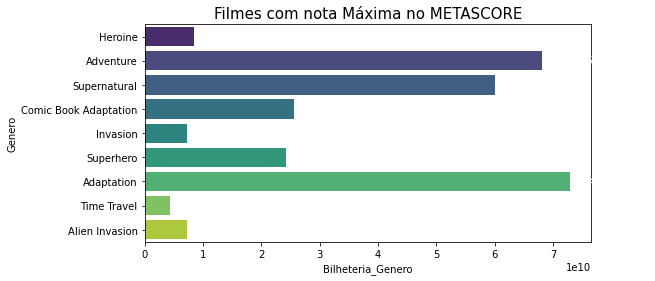

In [135]:
plt.figure(figsize=(8,4))
plt.title('Filmes com nota Máxima no METASCORE', fontsize=15)
metascore = sns.barplot(x='Bilheteria_Genero',y='Genero',data= genres.head(10), palette='viridis')

for p in metascore.patches:
    width = p.get_width()   
    metascore.text(width + -8, 
            p.get_y() + p.get_height() / 2, 
            '{:1.1f}'.format(width), 
            ha = 'left',   
            va = 'center',
            color='white') 
plt.show()